# Basic Linear Regression

In this Jupyter Notebook document, everytime you see `#To be completed`, you have to write a piece of code to advance in the exercise.

The objective of this exercise is to compute the model from the following data using least square linear regression.

Data:

| i | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| X (Input) | -2 | -1 | 0 | 1 | 2 | 3 | 4 |
| Y (Output) | -5 | -3 | -1 | 1 | 3 | 5 | 7 |

## Numerical least square resolution

The estimated function $\widehat{f(X)}$ is:

$\widehat{f(X)}=\widehat{\alpha}X+\widehat{\beta}$

$\widehat{\alpha}=\frac{\sum_{i=1}^{n} X_i y_i - n\bar{X}\bar{y}}{\sum_{i=1}^{n} X_i^2 - n\bar{X}^2}$

$\widehat{\beta}=\bar{y}-\widehat{\alpha}\bar{X}$

Go on and calculate the estimated function !

In [73]:
from numpy import mean
X=[-2,-1,0,1,2,3,4]
y=[-5,-3,-1,1,3,5,7]
def listElementwiseMult(lista,listb):
    return [a*b for a,b in zip(lista,listb)]

In [74]:
#alpha computation
SumXy=sum(listElementwiseMult(X,y))
SumXsquared=sum(listElementwiseMult(X,X))
meanX=mean(X)
meany=mean(y)
n=len(X)
alpha=((SumXy)-n*(mean(X)*mean(y)))/((SumXsquared)-(n*mean(X)*mean(y)))

#Check result here
alpha

2.0

In [75]:
#beta computation

beta=mean(y)-alpha*mean(X)

#Check result here
beta

-1.0

Verify if you can predict the value for 11

In [76]:
def estimate_function(X):
    return alpha*X + beta

#Try and see what you can estimate
estimate_function(10)

19.0

## Scikit-learn resolution

Now the goal is to perform the same resolution but to obtain it via the sci-kit learn library.
Therefore, we are going to use the `LinearRegression()` module from the library `sklearn.linear_model`.

`LinearRegression()` is a Python class that allows you to perform an ordinary least squares Linear Regression.
It has some options `LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)`:
- *fit_intercept* default value is True. If set to False the intercept value that we call here $\widehat{\beta}$ would be 0.
- *normalize* default value is False. If set to True, X will be normalized before regression, which means that X will be a vector of norm 1.
- *copy_X* default value is True. If set to False, operations are performed on X and might change it.
- *n_jobs* default value is None, which actually is translated to 1. If required, you can set a different value which would allocate a number of thread (parallel computing) to the learning process.

The model is saved inside `LinearRegression()` and you can calculate the values for the model using the method `.fit(X, y)`.

Here `X` represents the training data. It has the size `(n_samples,n_features)`, with `n_samples` the number of sample data and `n_features` the number of different features you are working from. In this first class, the number of features will be just 1 and multiple features will be seen in the next course talking about linear regression with multiple variables. So `n_features`=1.

`y` represents the target values according to `X`. It has the size `(n_samples,)`.

Now let's try to fit a `LinearRegression()` model !

In [77]:
from sklearn.linear_model import LinearRegression
import numpy as np

X=[-2,-1,0,1,2,3,4]
y=[-5,-3,-1,1,3,5,7]

X_train=np.array(X).reshape(-1,1) #array(list).reshape(-1,1)  to convert the data values 
y_train=np.array(y).reshape(-1,1)
regr = LinearRegression().fit(X_train, y_train)

The values that were estimated from that model can then be accessed using `.coef_` and `.intercept_`.

`.coef_` is an array of the estimated coefficients for the linear regression problem. It is of shape `(n_features, )`, so in our case it will be of shape  `(1, )`. ($\widehat{\alpha}$)

`.intercept_` is a float that gives the independent term of the linear model. ($\widehat{\beta}$)

In [78]:
# The estimated equation coefficients
print('Estimated equation is: (alpha ',regr.coef_[0,0],') X + (beta ',regr.intercept_[0],')')

Estimated equation is: (alpha  2.0 ) X + (beta  -1.0 )


## Congratulations ! your model has learned.

Now let's try to predict some values from that `regr` model that we have computed. Therefore we create some testing values continuing our original serie.

`LinearRegression()` has a method called `.predict(test_values)`, that requires some `test_values` that we will provide and allows you to predict the target values `y`.

Here `X_test` is an array of the next numbers of the serie X, which will be used for the prediction, `y_test` is an array of the actual values we know from that serie that we want to compare to the predicted values and `y_pred` will be the predicted values from our model.

In [79]:
A=[5,6,7,8]
B=[9,11,13,15]
X_test=np.array(A).reshape(-1,1)
y_test=np.array(B).reshape(-1,1)
#  #
y_pred=regr.predict(X_test)
y_pred
# ON VA MAINTENANT tester DE COMPARER :
# [Y_TEST] => (known test values) & [Y_PRED] => (predicted values)

array([[ 9.],
       [11.],
       [13.],
       [15.]])

To analyse the result you can use some metrics from the library `sklearn.metrics`

This library gives you access to two values, the `mean_squared_error` which is: $\frac{1}{n}\sum_{i=1}^n(y_i-\widehat{y_i})^2$.

And the coefficient of determination ($R^2$ score), which you all know from Excel, here `r2_score`, which is $R^2(y, \widehat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \widehat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


## Your results

This part will show you the result you had with the predicted model as a blue line and the test data in a black scatter plot. It uses the library `matplotlib` to do so.

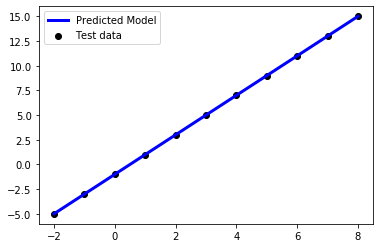

In [81]:
import matplotlib.pyplot as plt

plt.scatter(np.append(X_train,X_test), np.append(y_train,y_test),  color='black', label="Test data")
plt.plot(np.append(X_train,X_test), np.append(y_train,y_pred), color='blue', linewidth=3, label="Predicted Model")
plt.legend()

plt.show()

# Another example of linear regression

We will use the Cardekho dataset.
This dataset contains information about used cars listed on www.cardekho.com (an indian website) that are available for selling.
The goal here is to find linear regression coefficients between different part of that dataset.

columns of that dataset are:
- *Car_Name* The Name of the car
- *Year* The release year of that car (Year it was bought for the first time)
- *Selling_Price* The price it is sold
- *Km_driven* The kms driven with the car
- *Fuel* The type of fuel: Diesel, Petrol, Liquefied Petroleum Gas (LPG) or Compressed Natural Gas (CNG)
- *Seller_type* The type of seller that proposes the car: individual, car dealer or trustmark dealer
- *Transmission* Manual or Automatic
- *Owner* Number of previous owner
- *mileage* Consumption in km per l
- *engine* Dimension of the engine
- *max_power* Maximum power
- *Torque* Torque of the car
- *Seats* Number of seats

In [82]:
import pandas as pd
pd.set_option("display.max_rows", 16)

# LOADING THE DATASET
# THE DATASET SHOULD BE ALONG WITH THE NOTEBOOK AND THE PYTHON FILE

df = pd.read_csv('Cardekho.csv')
df['Selling_price']=0.013*df['Selling_price'] # Change the values from Indian Roupies to Us Dollar
df.head()

,Car_Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,5850.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2054.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,2925.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1690.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


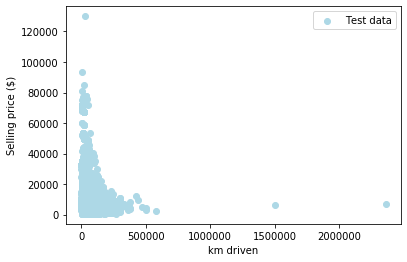

In [83]:
plt.scatter(df['Km_driven'],df['Selling_price'],  color='lightblue', label="Test data")
plt.legend()
plt.xlabel("km driven")
plt.ylabel("Selling price ($)")
plt.show()

## First exercise

The goal is to find the relationship between the *selling price* of the car and the *km it was driven* and then to analyze the result.

We will try to estimate the price of a car according to the km it has driven and to find the general relationship.

In [84]:
KmDriven_train=np.array(df['Km_driven'][-20:]).reshape(-1,1)
SellPrice_train=np.array(df['Selling_price'][-20:]).reshape(-1,1)

regr_car = LinearRegression().fit(KmDriven_train, SellPrice_train)

# The estimated equation coefficients
print('Estimated equation is: (',regr_car.coef_[0,0],') X + (',regr_car.intercept_[0],')')

Estimated equation is: ( -0.042789418134284864 ) X + ( 8501.304084011941 )


In [85]:
# Estimated equation is: ( -0.042789418134284864 ) X + ( 8501.304084011941 ). 
# It basicalymeans that for each X=1 km driven,your car looses 0.042 cents of value. 
# The basic value for anycar X=0 would be 8501.304084011941 : which is not true = explains the disparity.

Let's analyze the results using the tools we know. Is this a good result ?

In [119]:
KmDriven_test=np.array(df['Km_driven'][-nbValuestest:]).reshape(-1,1)
SellPrice_test=np.array(df['Selling_price'][-nbValuestest:]).reshape(-1,1)

SellPrice_pred = regr_car.predict(KmDriven_test)

# The mean squared error
print('Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(SellPrice_test, SellPrice_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(SellPrice_test, SellPrice_pred))
KmDriven_test.shape

Mean squared error: 3421.15
Coefficient of determination: 0.04


(50, 1)

That result is really poor.

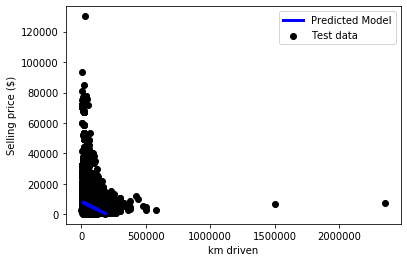

In [87]:
plt.plot(KmDriven_test, SellPrice_pred, color='blue', linewidth=3, label="Predicted Model")
plt.scatter(df['Km_driven'],df['Selling_price'],  color='black', label="Test data")
plt.legend()
plt.xlabel("km driven")
plt.ylabel("Selling price ($)")
plt.show()

In [88]:
# Data Disparity = Poor results 

Filter the data by brand. Try with 'Honda' cars

In [89]:
Honda=df[df['Car_Name'].str.contains('Honda')]
Honda.head()

,Car_Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,mileage,engine,max_power,torque,seats
2,Honda City 2017-2020 EXi,2006,2054.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
21,Honda WR-V i-DTEC VX,2017,12350.0,50000,Diesel,Individual,Manual,First Owner,25.5 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
42,Honda City i VTEC VX,2018,12025.0,28900,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
43,Honda City V MT,2013,5525.0,86300,Petrol,Dealer,Manual,First Owner,16.8 kmpl,1497 CC,116.3 bhp,146Nm@ 4800rpm,5.0
50,Honda Amaze S Diesel,2015,5525.0,49800,Diesel,Dealer,Manual,First Owner,24.7 kmpl,1498 CC,98.63 bhp,200Nm@ 1750rpm,5.0


In [103]:
Honda_KmDriven_train=np.array(Honda['Km_driven'][:-20]).reshape(-1,1)
Honda_SellPrice_train=np.array(Honda['Selling_price'][:-20]).reshape(-1,1)

regr_Honda = LinearRegression().fit(Honda_KmDriven_train, Honda_SellPrice_train)

# The estimated equation coefficients
print('Estimated equation is: (',regr_Honda.coef_[0,0],') X + (',regr_Honda.intercept_[0],')')

Honda_KmDriven_test=np.array(Honda['Km_driven'][-20:]).reshape(-1,1)
Honda_SellPrice_test=np.array(Honda['Selling_price'][:-20]).reshape(-1,1)

Honda_SellPrice_pred = regr_Honda.predict(Honda_KmDriven_train)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Honda_SellPrice_test, Honda_SellPrice_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Honda_SellPrice_test, Honda_SellPrice_pred))

Estimated equation is: ( -0.0440203024461961 ) X + ( 10455.38916880673 )
Mean squared error: 11099171.70
Coefficient of determination: 0.22


Estimated equation is: ( -0.05551498516170921 ) X + ( 11637.325200742787 )
Sqrt(Mean squared error): 3130.12
Coefficient of determination: 0.38


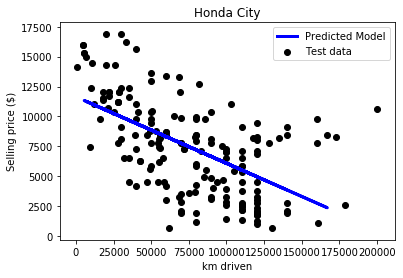

In [139]:
Honda_City=Honda.loc[Honda['Car_Name'].str.contains('City')]
Honda_City.head()

def CarDataKmPriceRegr(df,title,nbValuestest):
    df_KmDriven_train=np.array(df['Km_driven'][:-nbValuestest]).reshape(-1,1)
    df_SellPrice_train=np.array(df['Selling_price'][:-nbValuestest]).reshape(-1,1)

    regr_df = LinearRegression().fit(df_KmDriven_train,df_SellPrice_train)

    # The estimated equation coefficients
    print('Estimated equation is: (',regr_df.coef_[0,0],') X + (',regr_df.intercept_[0],')')

    df_KmDriven_test=np.array(df['Km_driven'][-nbValuestest:]).reshape(-1,1)
    df_SellPrice_test=np.array(df['Selling_price'][-nbValuestest:]).reshape(-1,1)

    df_SellPrice_pred = regr_df.predict(df_KmDriven_test)

    # The mean squared error
    print('Sqrt(Mean squared error): %.2f'
       % np.sqrt(mean_squared_error(df_SellPrice_test,df_SellPrice_pred)))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
       % r2_score(df_SellPrice_test,df_SellPrice_pred))


    plt.plot(df_KmDriven_test, df_SellPrice_pred, color='blue', linewidth=3, label="Predicted Model")
    plt.scatter(df['Km_driven'],df['Selling_price'],  color='black', label="Test data")
    plt.legend()
    plt.xlabel("km driven")
    plt.ylabel("Selling price ($)")
    plt.title(title)
    plt.show()
    
CarDataKmPriceRegr(Honda_City,'Honda City',50)

Estimated equation is: ( -0.05551498516170921 ) X + ( 11637.325200742787 )
Sqrt(Mean squared error): 3130.12
Coefficient of determination: 0.38


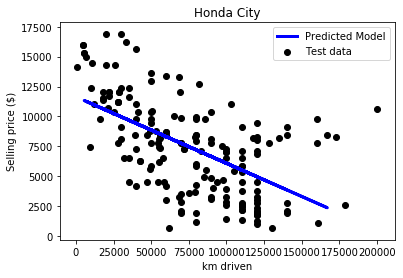

In [129]:
CarDataKmPriceRegr(Honda_City,'Honda City',50)

Find the different types of fuel and car seats number ? 
what is the difference when you buy a diesel car and a Petrol car ?

In [138]:
print(df['Fuel'].unique())
print(df['seats'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
[ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


Imagine you have a big family and you want to have a car which has at least 6 seats, no more than 50 000 kms driven and that uses Petrol. What would be the price of that car ?

In [ ]:
CarDataKmPriceRegr(#To be completed)

## Second exercise

What is the average km driven per year ?

In [ ]:
#To be completed

# Underfitting and Overfitting

## Definitions

**Underfitting** : Underfitting happens when a machine learning model is not complex enough to accurately capture relationships between a dataset’s features and a target variable. An underfitted model results in problematic or erroneous outcomes on new data, or data that it wasn’t trained on, and often performs poorly even on training data.

Using underfitted models for decision-making could be costly for businesses. For example, an underfitted model may suggest that you can always make better sales by spending more on marketing when in fact the model fails to capture a saturation effect (at some point, sales will flatten out no matter how much more you spend on marketing). If your business is relying on that model to determine your marketing budget, you will overspend on marketing.

**Overfitting** : Overfitting, the counterpart of underfitting, happens when a machine learning model has become too attuned to the data on which it was trained and therefore loses its applicability to any other dataset. A model is overfitted when it is so specific to the original data that trying to apply it to data collected in the future would result in problematic or erroneous outcomes and therefore less-than-optimal decisions.

Overfitting causes the model to misrepresent the data from which it learned. An overfitted model will be less accurate on new, similar data than a model which is more generally fitted, but the overfitted one will appear to have a higher accuracy when you apply it to the training data. With no protection against overfitting, model developers might train and deploy a model they think is highly accurate, when in fact it will underperform in production when given new data.

Deploying an overfitted model can cause all kinds of problems. For example, if you think your model is 95% accurate in predicting the likelihood of loan default when in reality it is overfitted and has an accuracy somewhere closer to 60%, applying it to future loan decisions will result in the loss of business that would otherwise have been profitable and will result in more dissatisfied customers.

 <img src=https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1526498075543.png>
(Image from https://www.datarobot.com/)

## Example

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.

**overfitting** and **underfitting** can be evaluated by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

### Functions used for the example

`Pipeline` is a function that allows to execute a sequence of transforms and a final estimator. It is designed for advanced machine learning projects. Intermediate steps of the pipeline must be ‘transforms’, that is, objects that have the `fit` and `transform` methods. The final estimator has to have a `fit` method. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. Here it is used to combine the `Polynomial Feature` and the `Linear regression`. Try adding `,verbose=True` at the end of the function call to see what is done during the processing.

`PolynomialFeatures` generates polynomial and interaction features. It generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is one dimensional of the form $[X]$, it gives the result as a polynom $[1,X,X^2,...,X^n]$. If an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$ (all the coefficients of the $(a+b)^n$ pair). See two examples below.

`cross_val_score` evaluates a score by cross-validation. Here `pipeline` is the model to be evaluated, `X[:, np.newaxis]` is the input dataset, `y` are the target values, `scoring` defines the function to be used to compute the score, `cv` is the amount of time the data is cross-validated. For example, `cv=5` computes the score 5 consecutive times with different splits of the input data each time.

`np.newaxis` is used to add one dimension to the array. For example, it changes the shape from one numpy array from (X,) to (X,1). See example below.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(3).reshape(3, 1)
print(X)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

In [ ]:
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

In [ ]:
a=np.arange(3).reshape(3, )
print(a.shape)
a=a[:, np.newaxis]
print(a.shape)
a=a[:, np.newaxis]
print(a.shape)

### Example

On the left: The figure shows an underfitted model

On the middle : The figure shows a well fitted model

On the right : The figure shows an overfitted model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()